#Data Cleaning

In [62]:
%pip install openpyxl

In [63]:
import pandas as pd
from matplotlib import pyplot as plt

In [64]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-08-14 18:29:56--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip.1’

online+retail.zip.1     [     <=>            ]  22.62M  23.4MB/s    in 1.0s    

2025-08-14 18:29:57 (23.4 MB/s) - ‘online+retail.zip.1’ saved [23715478]



In [65]:
!unzip online+retail.zip

Archive:  online+retail.zip
replace Online Retail.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Online Retail.xlsx      


In [66]:
df1=pd.read_excel("Online Retail.xlsx")
print(df1.shape)
df1.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [67]:
empty_counts = df1.isna().sum()
print(empty_counts)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [68]:
df1.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
318191,564825,22135,MINI LADLE LOVE HEART PINK,1,2011-08-30 12:26:00,0.83,NaN,United Kingdom
139776,548353,22677,FRENCH BLUE METAL DOOR SIGN 2,15,2011-03-30 15:05:00,1.25,15980.0,United Kingdom
320108,564962,22759,SET OF 3 NOTEBOOKS IN PARCEL,1,2011-08-31 14:35:00,1.65,17777.0,United Kingdom
171412,551414,22379,RECYCLING BAG RETROSPOT,5,2011-04-28 13:35:00,2.10,15622.0,United Kingdom
195352,553718,20725,LUNCH BAG RED RETROSPOT,1,2011-05-18 16:14:00,4.13,NaN,United Kingdom
518536,580115,23343,JUMBO BAG VINTAGE CHRISTMAS,66,2011-12-01 16:22:00,2.46,NaN,United Kingdom
294239,562708,21175,GIN + TONIC DIET METAL SIGN,3,2011-08-08 14:15:00,2.55,17085.0,United Kingdom
321974,565217,21422,PORCELAIN ROSE SMALL,288,2011-09-01 17:40:00,0.72,13099.0,United Kingdom
58184,541221,22738,RIBBON REEL SNOWY VILLAGE,2,2011-01-14 14:28:00,2.46,NaN,United Kingdom
81470,543132,22819,"BIRTHDAY CARD, RETRO SPOT",12,2011-02-03 15:27:00,0.42,15235.0,United Kingdom


In [69]:
df1["CustomerID"] = df1["CustomerID"].fillna("Unknown")
df1.sample(10)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [70]:
def to_int(idx):
  try:
    return int(idx)
  except:
    return idx

In [71]:
df1["CustomerID"]=df1["CustomerID"].apply(lambda idx: to_int(idx))
df1.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
358011,568135,21175,GIN + TONIC DIET METAL SIGN,1,2011-09-23 17:04:00,4.96,Unknown,United Kingdom
473253,576787,22356,CHARLOTTE BAG PINK POLKADOT,20,2011-11-16 13:54:00,0.85,13815,Germany
272156,560736,84978,HANGING HEART JAR T-LIGHT HOLDER,24,2011-07-20 15:33:00,1.25,15260,United Kingdom
522816,580469,22938,CUPCAKE LACE PAPER SET 6,1,2011-12-04 12:32:00,1.95,14583,United Kingdom
425469,573324,21352,EUCALYPTUS & PINECONE WREATH,12,2011-10-30 10:56:00,2.95,16235,United Kingdom
413604,572317,23336,EGG FRYING PAN PINK,1,2011-10-23 16:13:00,2.08,14629,United Kingdom
447326,574950,22792,FLUTED ANTIQUE CANDLE HOLDER,4,2011-11-08 09:29:00,1.63,Unknown,United Kingdom
30067,538844,22198,LARGE POPCORN HOLDER,13,2010-12-14 13:19:00,1.65,14680,United Kingdom
484415,577531,22964,3 PIECE SPACEBOY COOKIE CUTTER SET,1,2011-11-20 13:58:00,4.13,Unknown,United Kingdom
475458,576891,22750,FELTCRAFT PRINCESS LOLA DOLL,4,2011-11-16 17:26:00,3.75,12662,Germany


In [72]:
import numpy as np

def desc(idx):
  try:
    return idx.mode().iloc[0]
  except:
    return np.nan

In [73]:
desc_map=df1.groupby("StockCode")["Description"].agg(lambda idx: desc(idx))

In [74]:
df1["Correct Description"]=df1["StockCode"].map(desc_map)
df1.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Correct Description
474749,576848,23355,HOT WATER BOTTLE KEEP CALM,4,2011-11-16 15:38:00,4.95,15051,United Kingdom,HOT WATER BOTTLE KEEP CALM
206038,554860,84879,ASSORTED COLOUR BIRD ORNAMENT,8,2011-05-27 10:20:00,1.69,15249,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT
431554,573633,22961,JAM MAKING SET PRINTED,1,2011-10-31 15:48:00,3.29,Unknown,United Kingdom,JAM MAKING SET PRINTED
206916,554960,22041,"RECORD FRAME 7"" SINGLE SIZE",2,2011-05-27 15:18:00,4.96,Unknown,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE"
532228,580983,21918,SET 12 KIDS COLOUR CHALK STICKS,1,2011-12-06 16:26:00,0.83,Unknown,United Kingdom,SET 12 KIDS COLOUR CHALK STICKS
288502,562163,20972,PINK CREAM FELT CRAFT TRINKET BOX,12,2011-08-03 12:06:00,1.25,15628,United Kingdom,PINK CREAM FELT CRAFT TRINKET BOX
250851,559051,21166,COOK WITH WINE METAL SIGN,1,2011-07-05 16:47:00,4.13,Unknown,United Kingdom,COOK WITH WINE METAL SIGN
470142,576617,22713,CARD I LOVE LONDON,1,2011-11-15 16:57:00,0.83,Unknown,United Kingdom,CARD I LOVE LONDON
499086,578620,22086,PAPER CHAIN KIT 50'S CHRISTMAS,4,2011-11-24 15:21:00,2.95,17247,United Kingdom,PAPER CHAIN KIT 50'S CHRISTMAS
279459,561324,22461,SAVOY ART DECO CLOCK,6,2011-07-26 13:45:00,3.95,14414,United Kingdom,SAVOY ART DECO CLOCK


In [75]:
df1.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Correct Description,112


In [76]:
df1["Description"]=df1["Correct Description"]

In [77]:
df1.drop(columns=["Correct Description"], inplace=True)

In [78]:
df1.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
253284,559162,35916B,BLUE FELT HANGING HEART WITH FLOWER,1,2011-07-06 16:29:00,0.63,Unknown,United Kingdom
481006,577331,23439,HAND WARMER RED LOVE HEART,24,2011-11-18 14:23:00,2.10,14667,United Kingdom
353100,567721,23389,SPACEBOY MINI BACKPACK,12,2011-09-22 10:38:00,4.15,12409,Switzerland
22570,538174,22745,POPPY'S PLAYHOUSE BEDROOM,12,2010-12-10 09:35:00,2.10,12471,Germany
41658,539955,21864,UNION JACK FLAG PASSPORT COVER,1,2010-12-23 12:13:00,4.21,Unknown,United Kingdom
103810,545078,21931,JUMBO STORAGE BAG SUKI,1,2011-02-28 10:15:00,4.13,Unknown,United Kingdom
327533,565675,23046,PAPER LANTERN 9 POINT DELUXE STAR,20,2011-09-06 09:51:00,6.65,15513,United Kingdom
355889,567977,22966,GINGERBREAD MAN COOKIE CUTTER,1,2011-09-23 10:31:00,1.25,17388,United Kingdom
328376,565767,21484,CHICK GREY HOT WATER BOTTLE,2,2011-09-06 14:28:00,8.29,Unknown,United Kingdom
289323,562264,21224,SET/4 SKULL BADGES,1,2011-08-03 16:14:00,0.83,Unknown,United Kingdom


In [79]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


In [80]:
df1[df1["Quantity"]<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [81]:
df1[df1["UnitPrice"]<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.0,Unknown,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,Unknown,United Kingdom
1971,536546,22145,CHRISTMAS CRAFT HEART STOCKING,1,2010-12-01 14:33:00,0.0,Unknown,United Kingdom
1972,536547,37509,NEW ENGLAND MUG W GIFT BOX,1,2010-12-01 14:33:00,0.0,Unknown,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,Unknown,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,27,2011-12-08 10:33:00,0.0,Unknown,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,Unknown,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,Unknown,United Kingdom
538554,581408,85175,CACTI T-LIGHT CANDLES,20,2011-12-08 14:06:00,0.0,Unknown,United Kingdom


In [82]:
df2=df1[(df1["Quantity"]>0) & (df1["UnitPrice"]>0)].copy()
df2.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
444852,574741,23510,MINI PLAYING CARDS GYMKHANA,2,2011-11-06 16:13:00,0.42,15993,United Kingdom
205372,554808,23076,ICE CREAM SUNDAE LIP GLOSS,24,2011-05-26 13:01:00,1.25,17059,United Kingdom
318226,564825,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1,2011-08-30 12:26:00,10.79,Unknown,United Kingdom
231435,557267,20839,FRENCH PAISLEY CUSHION COVER,6,2011-06-19 11:23:00,0.85,16805,United Kingdom
509429,579301,21243,PINK POLKADOT PLATE,1,2011-11-29 11:32:00,1.69,18118,United Kingdom
32919,539211,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2010-12-16 12:15:00,2.10,16743,United Kingdom
210036,555276,22255,FELT TOADSTOOL SMALL,1,2011-06-01 17:28:00,1.63,Unknown,United Kingdom
237712,557878,22179,SET 10 NIGHT OWL LIGHTS,2,2011-06-23 13:13:00,6.75,16940,United Kingdom
477554,577058,20725,LUNCH BAG RED RETROSPOT,2,2011-11-17 14:29:00,1.65,18122,United Kingdom
455136,575607,22960,JAM MAKING SET WITH JARS,4,2011-11-10 12:37:00,8.29,14096,United Kingdom


In [83]:
df2.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [84]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice
count,530104.000000,530104,530104.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625
min,1.000000,2010-12-01 08:26:00,0.001000
25%,1.000000,2011-03-28 12:22:00,1.250000
50%,3.000000,2011-07-20 12:58:00,2.080000
75%,10.000000,2011-10-19 12:39:00,4.130000
max,80995.000000,2011-12-09 12:50:00,13541.330000
std,155.524124,NaN,35.915681


#Sales Analysis

In [85]:
df2["TotalSales"]=df2["UnitPrice"]*df2["Quantity"]
df2.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
81280,543116,21621,VINTAGE UNION JACK BUNTING,12,2011-02-03 13:29:00,8.50,17672,United Kingdom,102.00
414301,572447,21987,PACK OF 6 SKULL PAPER CUPS,2,2011-10-24 12:25:00,0.65,17811,United Kingdom,1.30
29508,538801,22074,6 RIBBONS SHIMMERING PINKS,24,2010-12-14 11:51:00,0.42,16083,United Kingdom,10.08
182810,552574,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,100,2011-05-10 12:20:00,1.79,15311,United Kingdom,179.00
234223,557502,22367,CHILDRENS APRON SPACEBOY DESIGN,1,2011-06-20 15:32:00,4.13,Unknown,United Kingdom,4.13
41321,539826,21485,RETROSPOT HEART HOT WATER BOTTLE,6,2010-12-22 12:39:00,4.95,15044,United Kingdom,29.70
526413,580667,23247,BISCUIT TIN 50'S CHRISTMAS,1,2011-12-05 14:19:00,2.89,15031,United Kingdom,2.89
137943,548176,22431,WATERING CAN BLUE ELEPHANT,1,2011-03-29 14:20:00,1.95,13439,United Kingdom,1.95
533172,581016,23530,WALL ART ONLY ONE PERSON,6,2011-12-07 09:53:00,4.95,14141,United Kingdom,29.70
204460,554665,23301,GARDENERS KNEELING PAD KEEP CALM,12,2011-05-25 14:44:00,1.65,14336,United Kingdom,19.80


In [86]:
df2["Month"]=df2["InvoiceDate"].dt.month
df2.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
26926,538524,21942,SKULLS DESIGN FLANNEL,1,2010-12-13 09:35:00,1.66,Unknown,United Kingdom,1.66,12
361075,568325,22398,MAGNETS PACK OF 4 SWALLOWS,12,2011-09-26 13:57:00,0.39,14667,United Kingdom,4.68,9
3198,536609,21068,VINTAGE BILLBOARD LOVE/HATE MUG,6,2010-12-02 09:41:00,1.06,17850,United Kingdom,6.36,12
238760,557956,22418,10 COLOUR SPACEBOY PEN,12,2011-06-23 19:20:00,0.85,18283,United Kingdom,10.20,6
345889,567182,23286,BLUE VINTAGE SPOT BEAKER,12,2011-09-18 15:21:00,0.85,13334,United Kingdom,10.20,9
202224,554372,20979,36 PENCILS TUBE RED RETROSPOT,16,2011-05-24 10:50:00,1.25,13842,United Kingdom,20.00,5
84552,543399,22372,AIRLINE BAG VINTAGE WORLD CHAMPION,1,2011-02-08 11:07:00,8.29,Unknown,United Kingdom,8.29,2
343979,566976,23445,ICE CREAM BUBBLES,20,2011-09-16 09:27:00,0.83,15382,United Kingdom,16.60,9
513850,579600,22191,IVORY DINER WALL CLOCK,2,2011-11-30 12:00:00,8.50,13647,United Kingdom,17.00,11
28091,538626,79067,CORONA MEXICAN TRAY,4,2010-12-13 12:57:00,3.75,17338,United Kingdom,15.00,12


In [87]:
monthly_sales =df2.groupby("Month")["TotalSales"].sum()
monthly_sales

,TotalSales
Month,
1,691364.560
2,523631.890
3,717639.360
4,537808.621
5,770536.020
6,761739.900
7,719221.191
8,759138.380
9,1058590.172


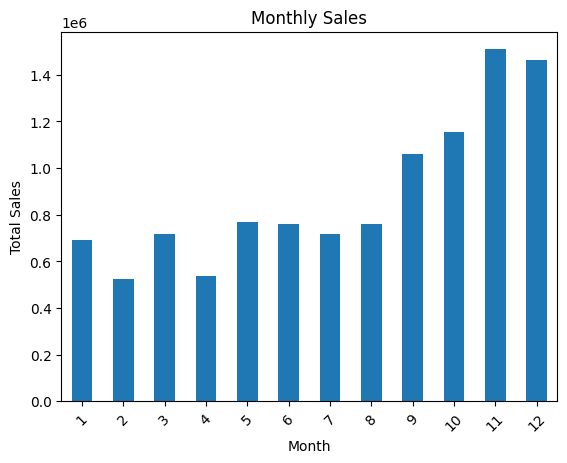

In [88]:
import matplotlib.pyplot as plt
monthly_sales.plot(kind="bar")
# monthly_sales.plot()
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [89]:
country_sales=df2.groupby("Country")["TotalSales"].sum()
country_sales.sort_values(ascending=False, inplace=True)
country_sales

,TotalSales
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110
Australia,138521.310
Spain,61577.110
Switzerland,57089.900
Belgium,41196.340


Country
United Kingdom    89.958016
Netherlands        2.845158
EIRE               2.825300
Germany            2.281211
France             2.090315
Name: TotalSales, dtype: float64


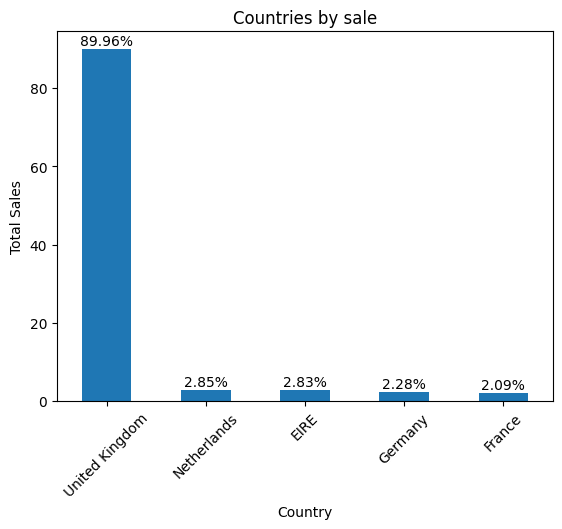

In [90]:
country_sales_top5=country_sales.head()
country_sales_percent=((country_sales_top5)/(country_sales_top5).sum())*100
print(country_sales_percent)
country_sales_percent.plot(kind="bar")

for i in range(len(country_sales_percent)):
  val=country_sales_percent.iloc[i]
  plt.text(i, val+1, f"{val:.2f}%",ha="center")


plt.title("Countries by sale")
plt.ylabel("Total Sales")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

In [91]:
product_sales=df2.groupby("StockCode")[["Description","TotalSales"]].sum()
product_sales.sort_values(by="TotalSales",ascending=False,inplace=True)
print(df2[["Description", "TotalSales"]].dtypes)
product_sales.head()

Description     object
TotalSales     float64
dtype: object


,Description,TotalSales
StockCode,,
DOT,DOTCOM POSTAGEDOTCOM POSTAGEDOTCOM POSTAGEDOTC...,206248.77
22423,REGENCY CAKESTAND 3 TIERREGENCY CAKESTAND 3 TI...,174484.74
23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60
85123A,WHITE HANGING HEART T-LIGHT HOLDERWHITE HANGIN...,104518.80
47566,PARTY BUNTINGPARTY BUNTINGPARTY BUNTINGPARTY B...,99504.33


In [92]:
product_sales_percent=product_sales.copy()
product_sales_percent["TotalSales"]=((product_sales["TotalSales"])/(product_sales["TotalSales"].sum())*100).round(3)
product_sales_percent.rename(columns={
    "TotalSales":"TotalSalesPercent"
},inplace=True)
product_sales_percent.head()

,Description,TotalSalesPercent
StockCode,,
DOT,DOTCOM POSTAGEDOTCOM POSTAGEDOTCOM POSTAGEDOTC...,1.934
22423,REGENCY CAKESTAND 3 TIERREGENCY CAKESTAND 3 TI...,1.636
23843,"PAPER CRAFT , LITTLE BIRDIE",1.579
85123A,WHITE HANGING HEART T-LIGHT HOLDERWHITE HANGIN...,0.980
47566,PARTY BUNTINGPARTY BUNTINGPARTY BUNTINGPARTY B...,0.933



# Customer Segregation

In [104]:
curr_date=df2["InvoiceDate"].max()
curr_date=curr_date.date()+pd.Timedelta(days=1)
curr_date
print(df2["InvoiceDate"].max().date())

2011-12-09


In [107]:
rfm=df2.groupby("CustomerID").agg(
    {
        "InvoiceDate":lambda idx: (curr_date-idx.max().date()).days,
        "InvoiceNo":"count",
        "TotalSales":"sum"
    }
)
rfm.columns = ["Recency","Frequency","Monetary"]
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,3,182,4310.00
12348,76,31,1797.24
12349,19,73,1757.55
12350,311,17,334.40


In [108]:
rfm.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4.339000e+03
mean,93.038258,122.171929,2.458328e+03
std,100.010502,2018.863821,2.809265e+04
min,1.000000,1.000000,3.750000e+00
25%,18.000000,17.000000,3.074300e+02
50%,51.000000,41.000000,6.745200e+02
75%,142.500000,100.000000,1.662060e+03
max,374.000000,132220.000000,1.755277e+06


In [122]:
rfm["R_score"]=pd.qcut(rfm["Recency"],4,labels=[4,3,2,1])
rfm["F_score"]=pd.qcut(rfm["Frequency"],4,labels=[1,2,3,4])
rfm["M_score"]=pd.qcut(rfm["Monetary"],4,labels=[1,2,3,4])

In [123]:
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,4,9
12347,3,182,4310.00,4,4,4,9
12348,76,31,1797.24,2,2,4,9
12349,19,73,1757.55,3,3,4,9
12350,311,17,334.40,1,1,2,7


In [124]:
df2[df2["CustomerID"]==12350]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
80323,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02 16:01:00,2.10,12350,Norway,25.2,2
80324,543037,22412,METAL SIGN NEIGHBOURHOOD WITCH,12,2011-02-02 16:01:00,2.10,12350,Norway,25.2,2
80325,543037,79066K,RETRO MOD TRAY,10,2011-02-02 16:01:00,0.85,12350,Norway,8.5,2
80326,543037,79191C,RETRO PLASTIC ELEPHANT TRAY,12,2011-02-02 16:01:00,0.85,12350,Norway,10.2,2
80327,543037,22348,TEA BAG PLATE RED RETROSPOT,24,2011-02-02 16:01:00,0.85,12350,Norway,20.4,2
80328,543037,84086C,PINK/PURPLE RETRO RADIO,6,2011-02-02 16:01:00,2.95,12350,Norway,17.7,2
80329,543037,22551,PLASTERS IN TIN SPACEBOY,12,2011-02-02 16:01:00,1.65,12350,Norway,19.8,2
80330,543037,22557,PLASTERS IN TIN VINTAGE PAISLEY,12,2011-02-02 16:01:00,1.65,12350,Norway,19.8,2
80331,543037,21832,CHOCOLATE CALCULATOR,12,2011-02-02 16:01:00,1.65,12350,Norway,19.8,2
80332,543037,21915,RED HARMONICA IN BOX,12,2011-02-02 16:01:00,1.25,12350,Norway,15.0,2


In [130]:
rfm["RFM_score"]=rfm[["R_score","F_score","M_score"]].astype(int).sum(axis=1)
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,4,6
12347,3,182,4310.00,4,4,4,12
12348,76,31,1797.24,2,2,4,8
12349,19,73,1757.55,3,3,4,10
12350,311,17,334.40,1,1,2,4


In [131]:
rfm.sort_values(by="RFM_score",ascending=False)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
CustomerID,,,,,,,
12347,3,182,4310.00,4,4,4,12
Unknown,1,132220,1755276.64,4,4,4,12
13571,13,341,2092.32,4,4,4,12
13576,11,126,6717.34,4,4,4,12
13588,16,174,2478.95,4,4,4,12
...,...,...,...,...,...,...,...
15823,373,1,15.00,1,1,1,3
15820,320,17,206.98,1,1,1,3
18269,367,7,168.60,1,1,1,3


# Churn Analysis

In [138]:
churn_thresh=90
churn_df=rfm[rfm["Recency"]>churn_thresh]
churn_df.min()

,0
Recency,92.00
Frequency,1.00
Monetary,3.75
R_score,2.00
F_score,1.00
M_score,1.00
RFM_score,3.00


In [139]:
churn_df

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,4,6
12350,311,17,334.40,1,1,2,4
12353,205,4,89.00,1,1,1,3
12354,233,58,1079.40,1,3,3,7
12355,215,13,459.40,1,1,2,4
...,...,...,...,...,...,...,...
18262,141,13,149.48,2,1,1,4
18268,135,1,25.50,2,1,1,4
18269,367,7,168.60,1,1,1,3


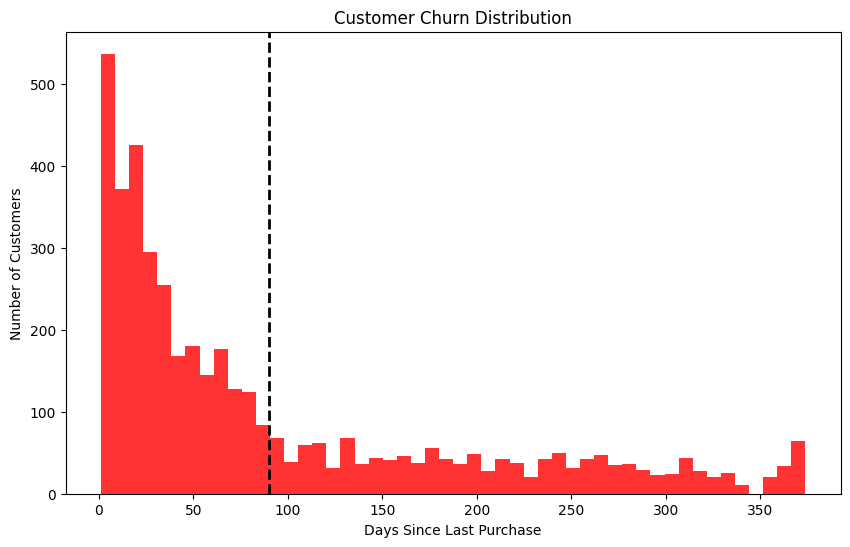

In [152]:
plt.figure(figsize=(10, 6))
plt.hist(rfm["Recency"],bins=50,color="red",alpha=0.8)
plt.axvline(churn_thresh, color='black', linestyle='--', linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()